<a href="https://colab.research.google.com/github/JuanPepito69/PROJET_IA/blob/main/project_IA_06.02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Récupération et nettoyage préliminaire des données "train" :

train1 = pd.read_csv('train_FD001.csv')
#train1.info()
train2 = pd.read_csv('train_FD002.csv')
#train2.info()
train3 = pd.read_csv('train_FD003.csv')
#train3.info()
train4 = pd.read_csv('train_FD004.csv')
#train4.info()

train1 = train1.drop_duplicates()
train1 = train1.dropna()
train2 = train2.drop_duplicates()
train2 = train2.dropna()
train3 = train3.drop_duplicates()
train3 = train3.dropna()
train4 = train4.drop_duplicates()
train4 = train4.dropna()


In [4]:
#Récupération et nettoyage préliminaire des données "test" :

test1 = pd.read_csv('test_FD001.csv')
#test1.info()
test2 = pd.read_csv('test_FD002.csv')
#test2.info()
test3 = pd.read_csv('test_FD003.csv')
#test3.info()
test4 = pd.read_csv('test_FD004.csv')
#test4.info()

test1 = test1.drop_duplicates()
test1 = test1.dropna()
test2 = test2.drop_duplicates()
test2 = test2.dropna()
test3 = test3.drop_duplicates()
test3 = test3.dropna()
test4 = test4.drop_duplicates()
test4 = test4.dropna()

In [5]:
#Concaténation et renettoyage de toutes les données :
DATAS = pd.concat([train1.iloc[:, 1:],
                     train2.iloc[:, 1:],
                     train3.iloc[:, 1:],
                     train4.iloc[:, 1:],
                     test1.iloc[:, 1:],
                     test2.iloc[:, 1:],
                     test3.iloc[:, 1:],
                     test4.iloc[:, 1:]], axis=0)
DATAS = DATAS.drop_duplicates()
DATAS = DATAS.dropna()
DATAS.columns = ["Parameter 1",
                 "Parameter 2",
                 "Parameter 3",
                 "T° tot fan inlet [°R]",
                 "T LPC outlet [°R]",
                 "T HPC outlet [°R]",
                 "T LPT outlet [°R]",
                 "P fan inlet [psia]",
                 "P tot bypass-duct [psia]",
                 "P tot HPC outlet [psia]",
                 "Fan speed [rpm]",
                 "Core speed [rpm]",
                 "Engine pressure ratio",
                 "P static HPC outlet [psia]",
                 "Ratio of fuel flow to Ps30",
                 "Corrected fan speed [rpm]",
                 "Corrected core speed [rpm]",
                 "Bypass ratio",
                 "Burner fuel-air ratio",
                 "Bleed Enthalpy",
                 "Demanded fan speed [rpm]",
                 "Demanded corrected fan speed [rpm]",
                 "HPT oolant bleed [lbm/s]",
                 "LPT coolant [lmb/s]",
                 "RUL"]
DATAS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265256 entries, 0 to 41213
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Parameter 1                         265256 non-null  float64
 1   Parameter 2                         265256 non-null  float64
 2   Parameter 3                         265256 non-null  float64
 3   T° tot fan inlet [°R]               265256 non-null  float64
 4   T LPC outlet [°R]                   265256 non-null  float64
 5   T HPC outlet [°R]                   265256 non-null  float64
 6   T LPT outlet [°R]                   265256 non-null  float64
 7   P fan inlet [psia]                  265256 non-null  float64
 8   P tot bypass-duct [psia]            265256 non-null  float64
 9   P tot HPC outlet [psia]             265256 non-null  float64
 10  Fan speed [rpm]                     265256 non-null  float64
 11  Core speed [rpm]                

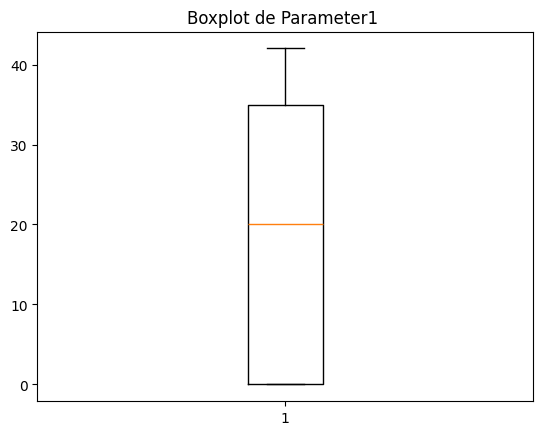

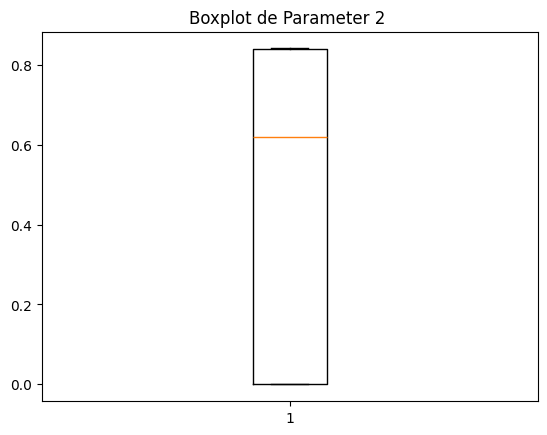

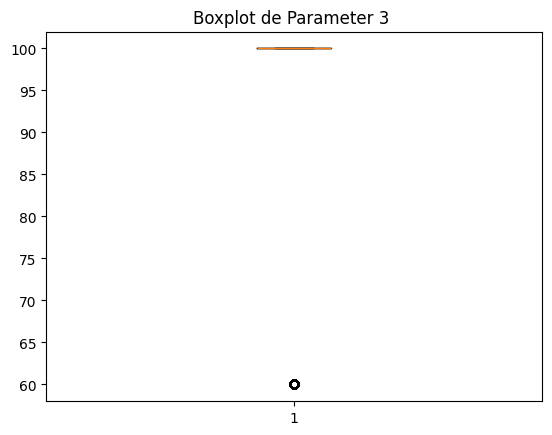

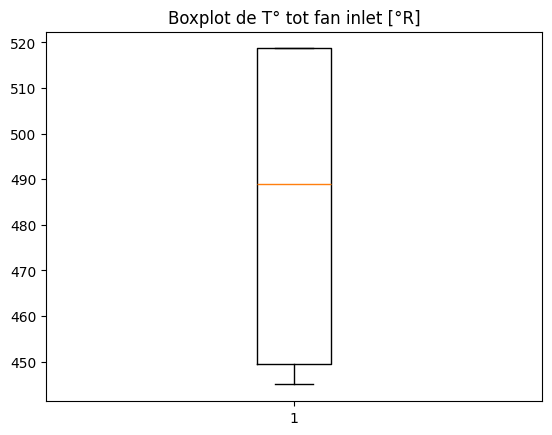

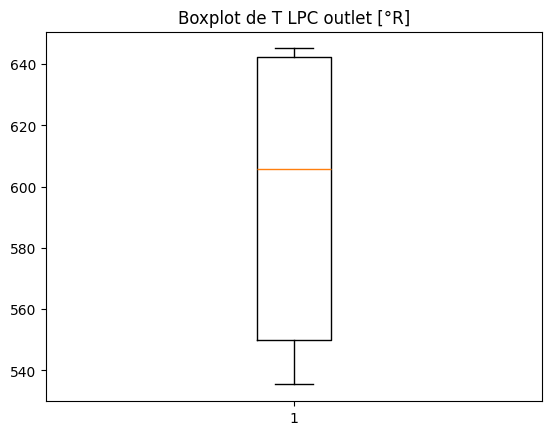

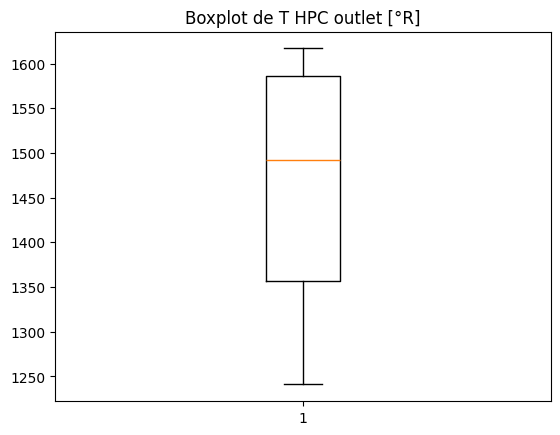

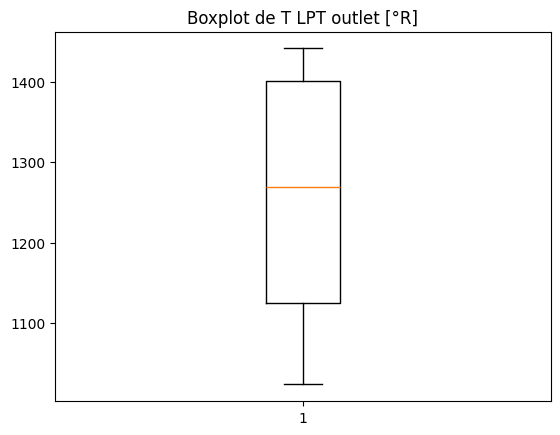

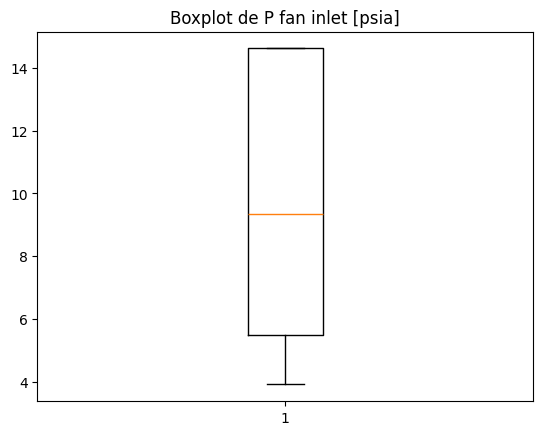

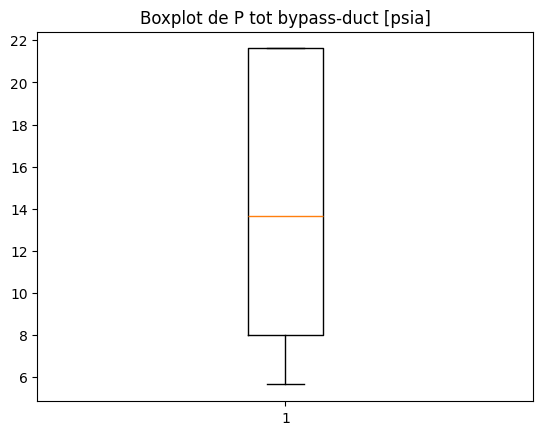

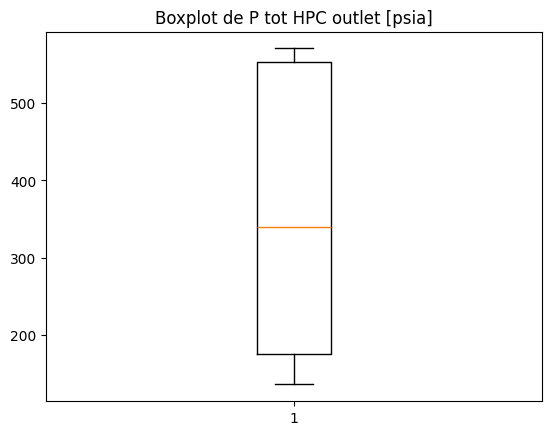

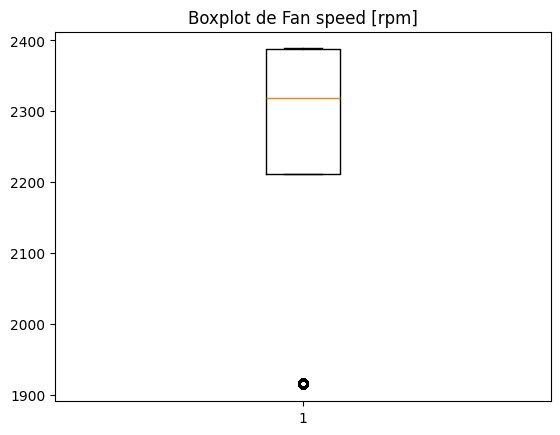

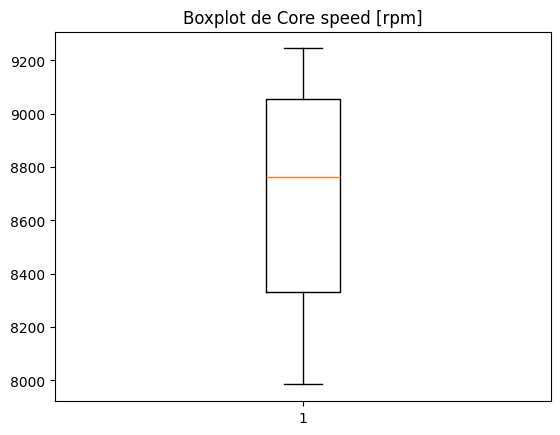

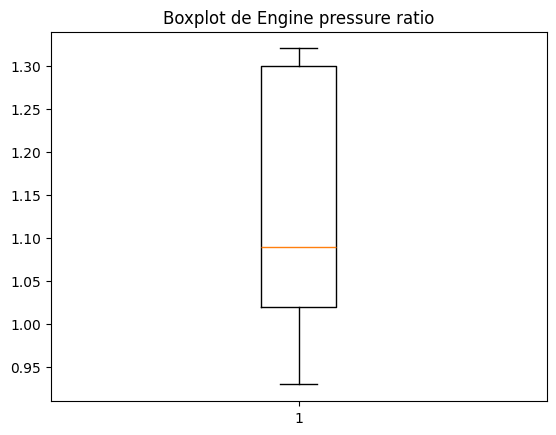

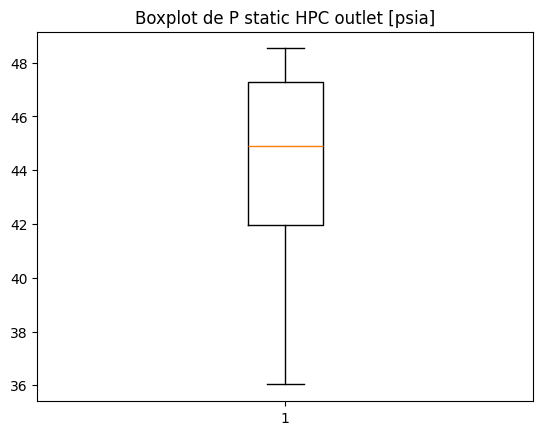

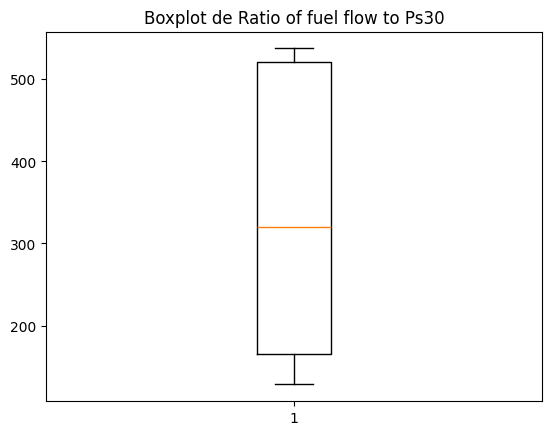

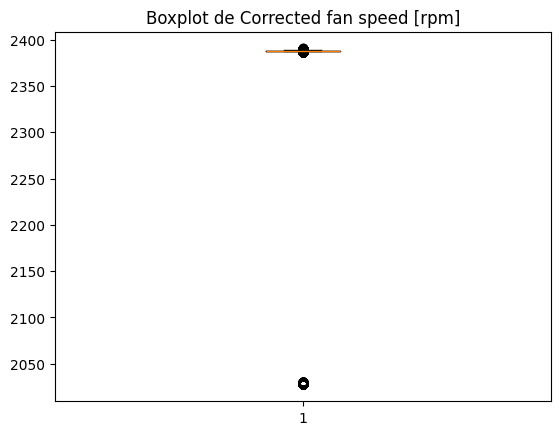

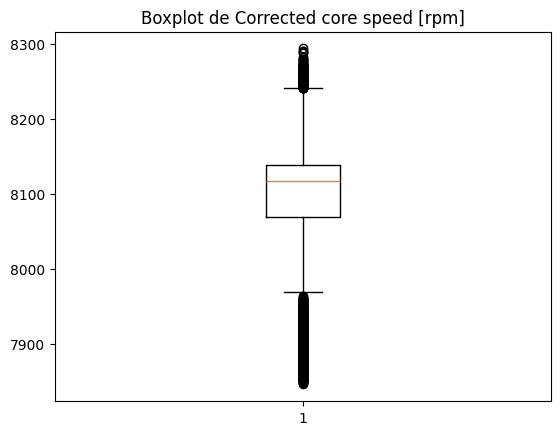

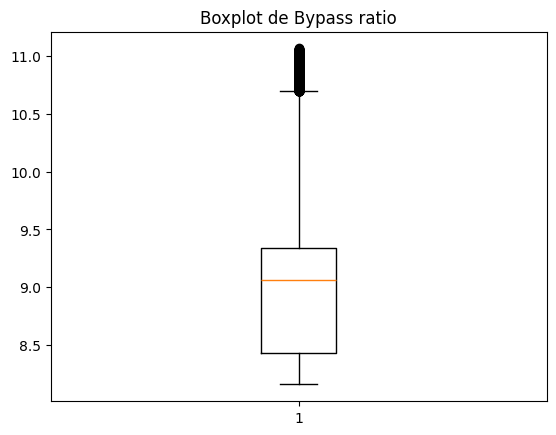

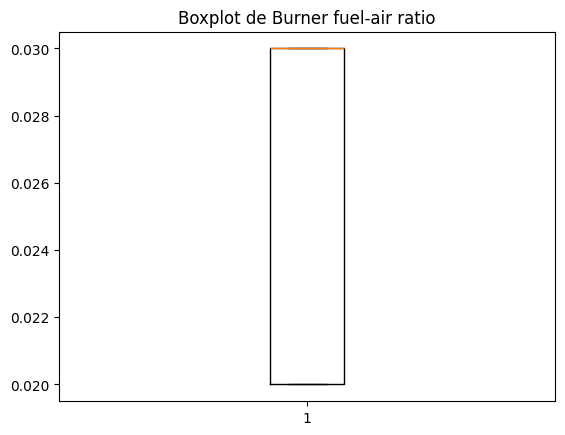

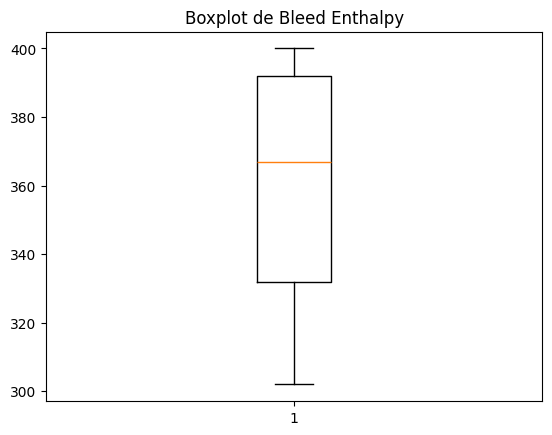

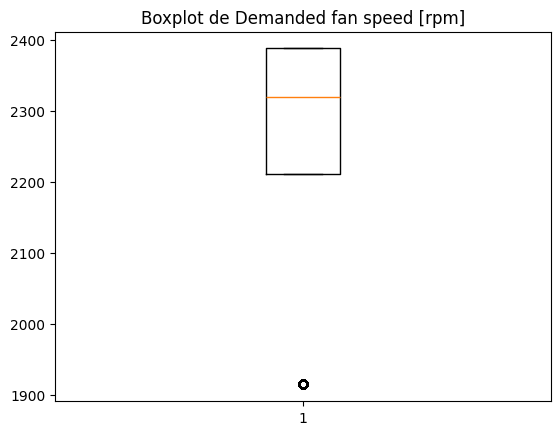

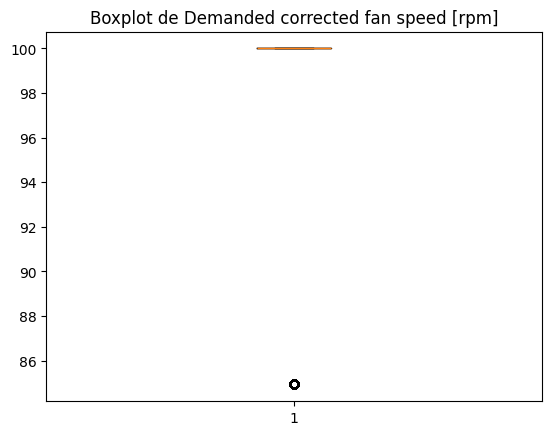

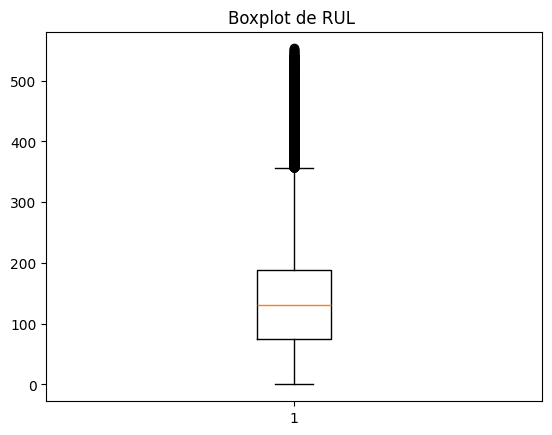

In [6]:
#Tracé des boxplots pour visualiser les outlayers
List_columns = list(DATAS.columns)

plt.boxplot(DATAS["Parameter 1"])
plt.title("Boxplot de Parameter1 ")
plt.show()

plt.boxplot(DATAS["Parameter 2"])
plt.title("Boxplot de Parameter 2 ")
plt.show()

plt.boxplot(DATAS["Parameter 3"])
plt.title("Boxplot de Parameter 3 ")
plt.show()

for i in range(3, 22):
    plt.boxplot(DATAS[List_columns[i]])
    plt.title("Boxplot de " + DATAS.columns[i])
    plt.show()

plt.boxplot(DATAS["RUL"])
plt.title("Boxplot de RUL ")
plt.show()

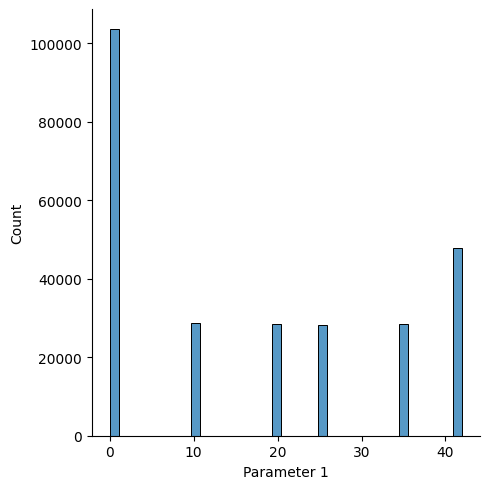

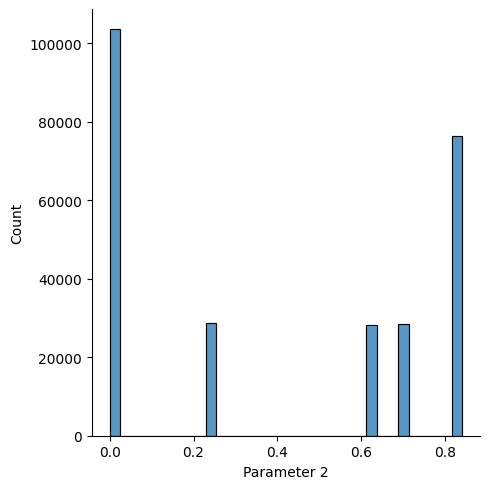

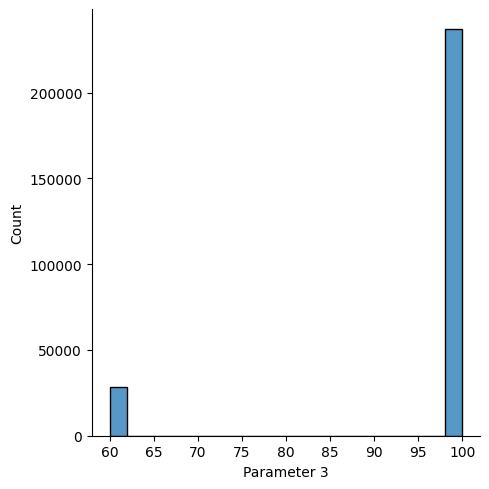

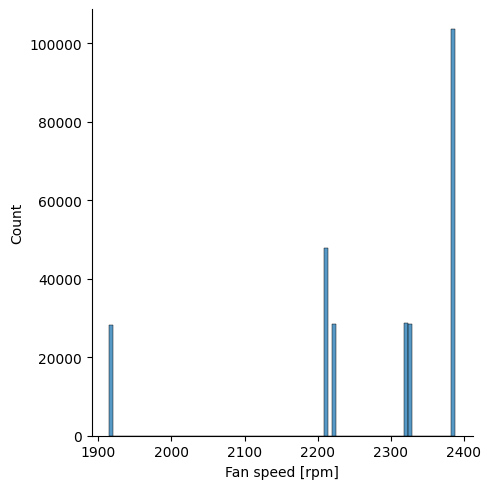

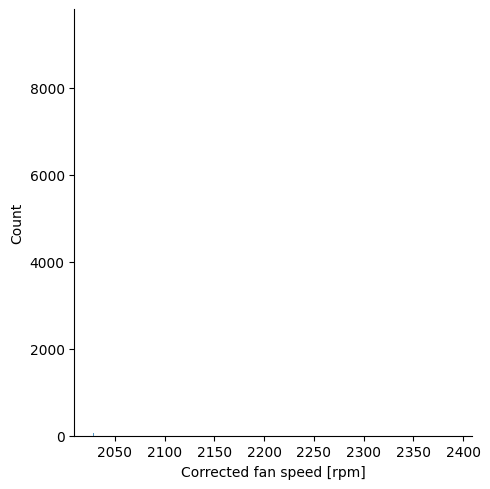

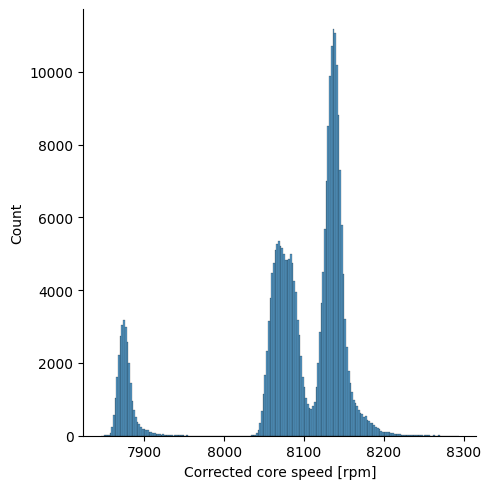

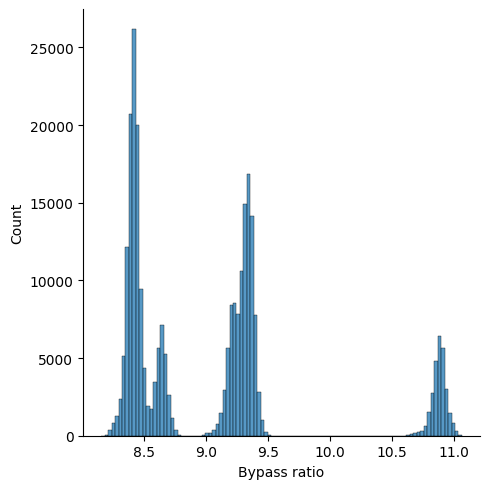

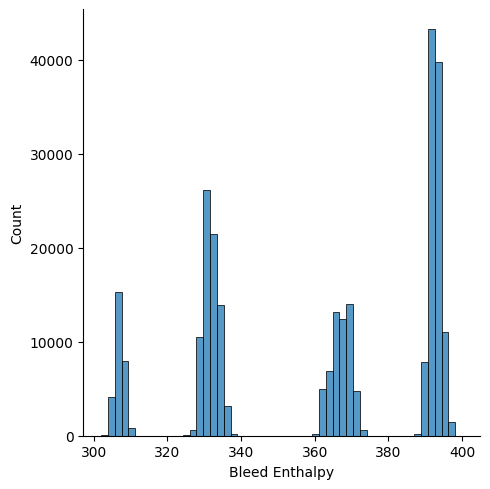

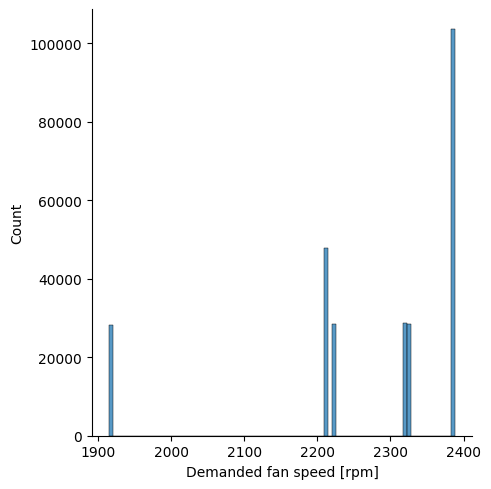

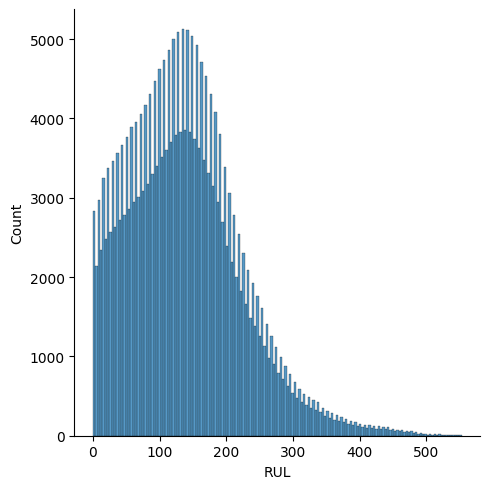

In [9]:
#visualisation des distributions pour les boxplots qui semblent bizarre

sns.displot(data=DATAS, x=List_columns[0])
plt.show()

sns.displot(data=DATAS, x=List_columns[1])
plt.show()

sns.displot(data=DATAS, x=List_columns[2])
plt.show()

sns.displot(data=DATAS, x=List_columns[10])
plt.show()

sns.displot(data=DATAS, x=List_columns[15])
plt.show()

sns.displot(data=DATAS, x=List_columns[16])
plt.show()

sns.displot(data=DATAS, x=List_columns[17])
plt.show()

sns.displot(data=DATAS, x=List_columns[19])
plt.show()

sns.displot(data=DATAS, x=List_columns[20])
plt.show()

sns.displot(data=DATAS, x="RUL")
plt.show()
#pas d'outlayers à supprimer

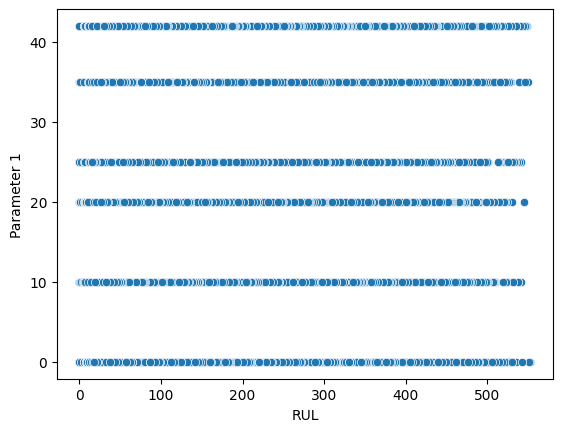

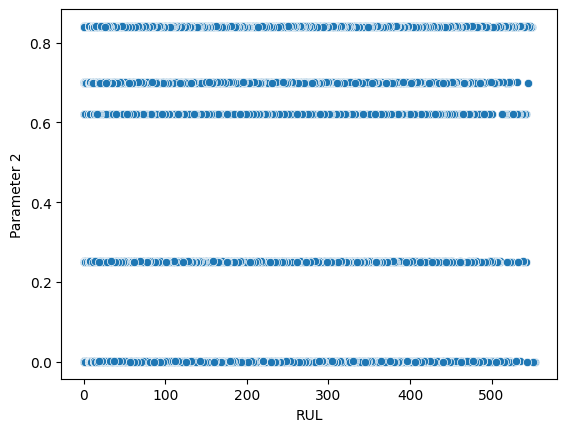

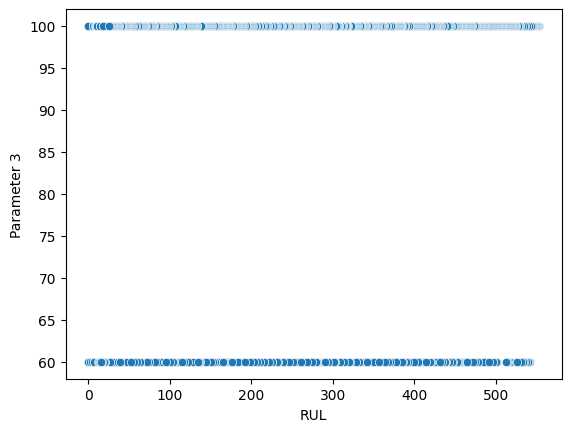

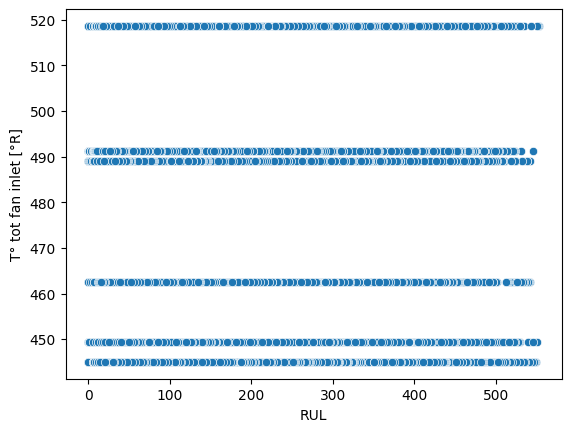

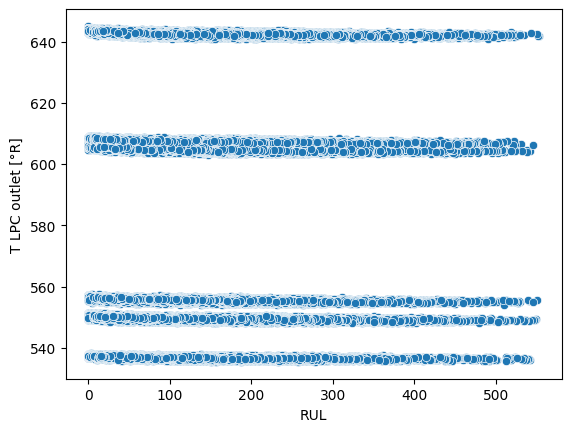

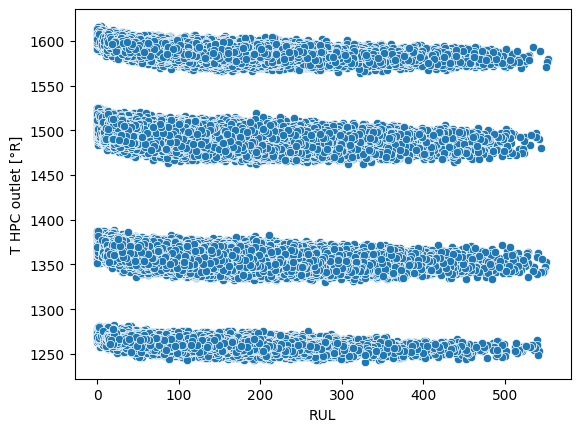

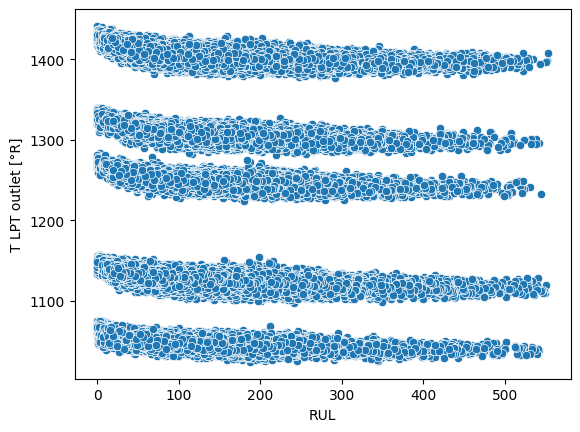

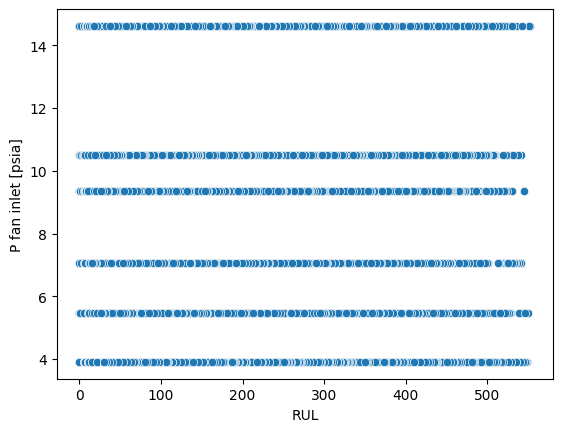

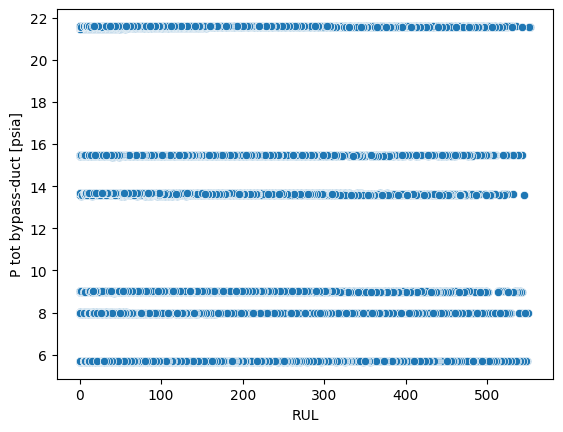

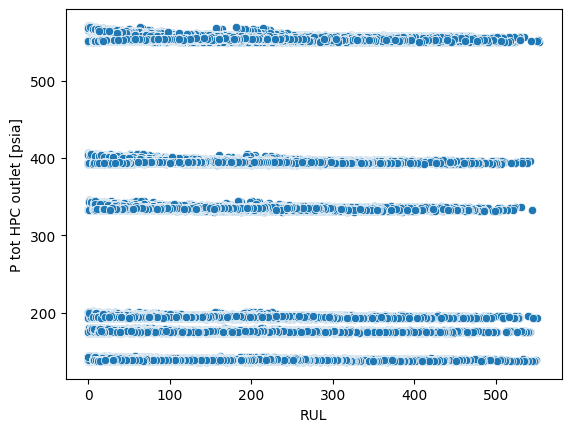

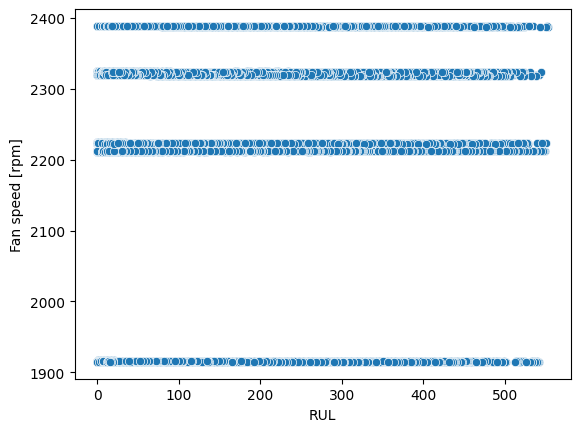

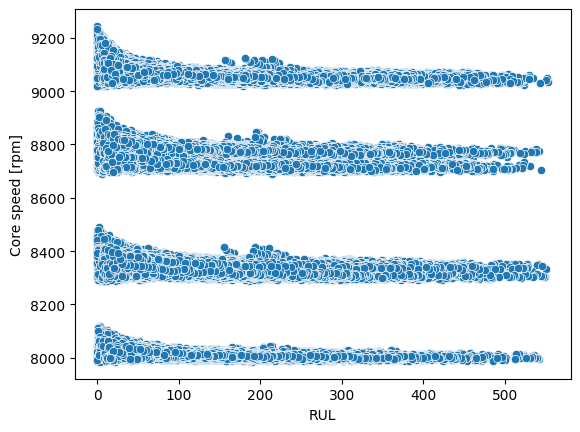

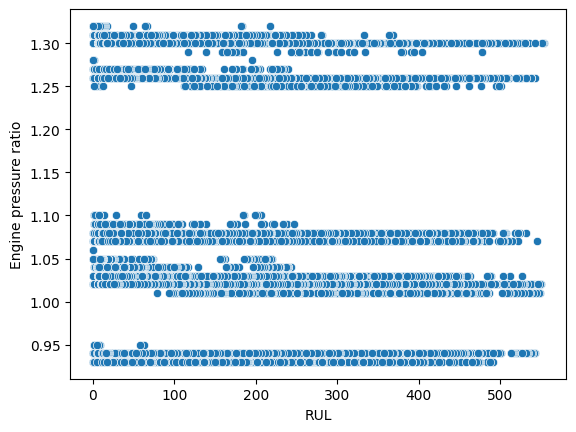

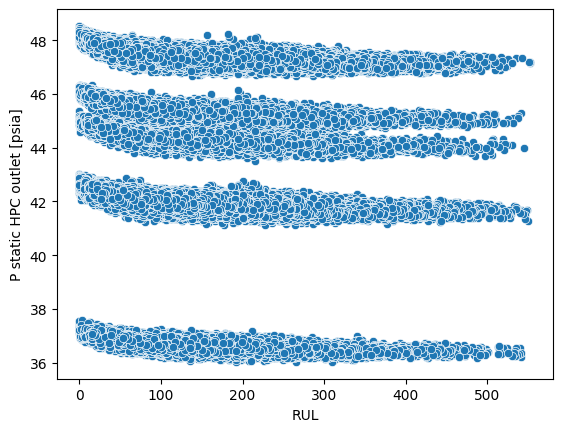

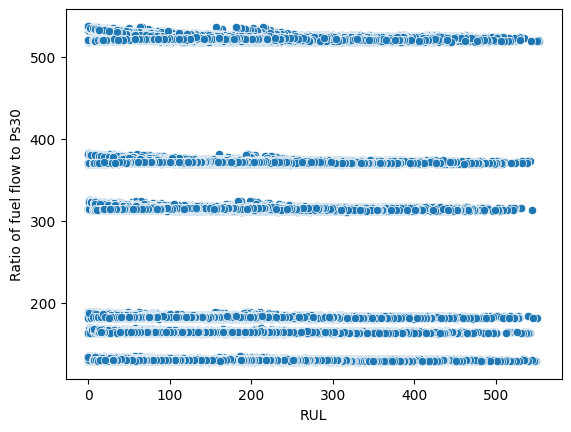

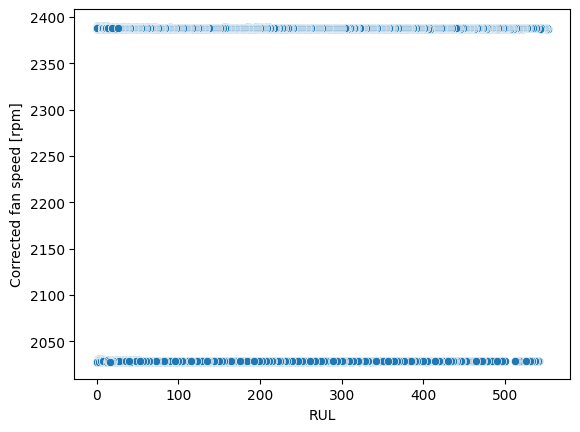

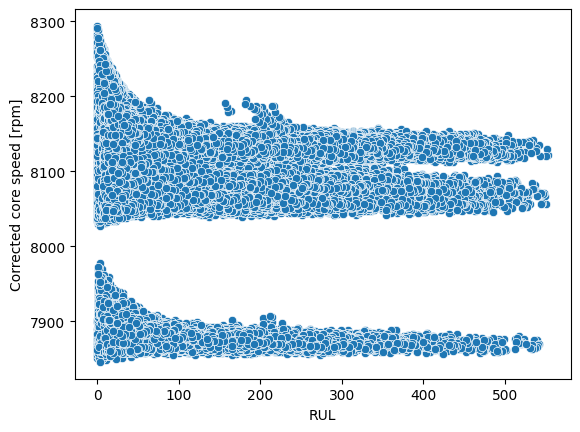

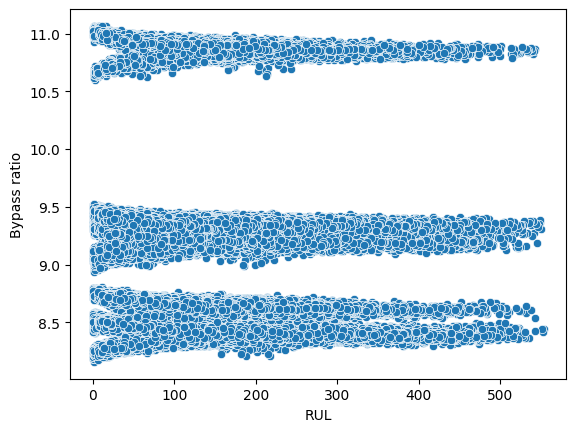

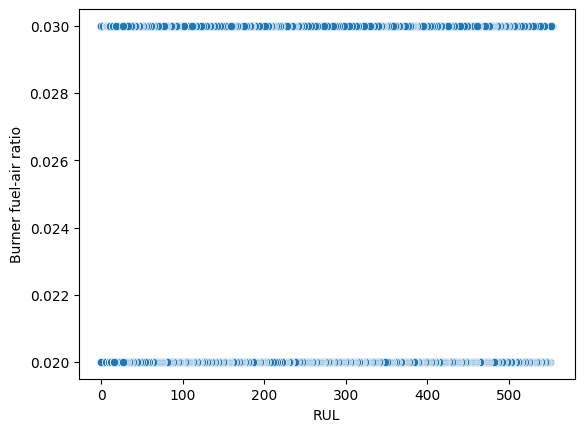

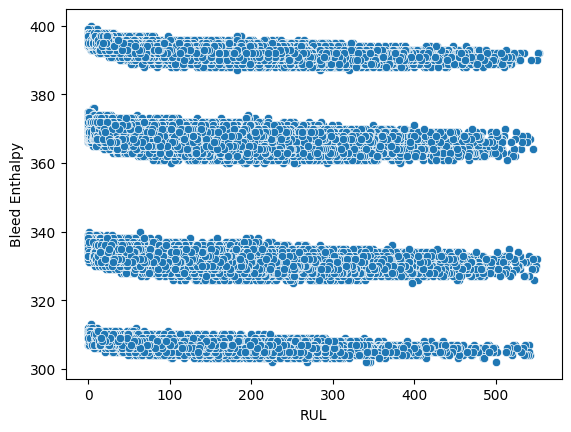

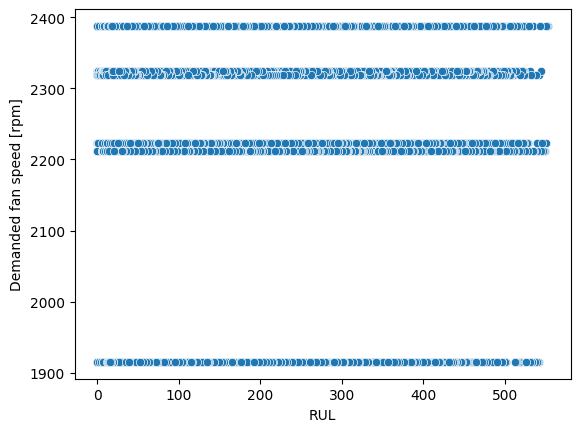

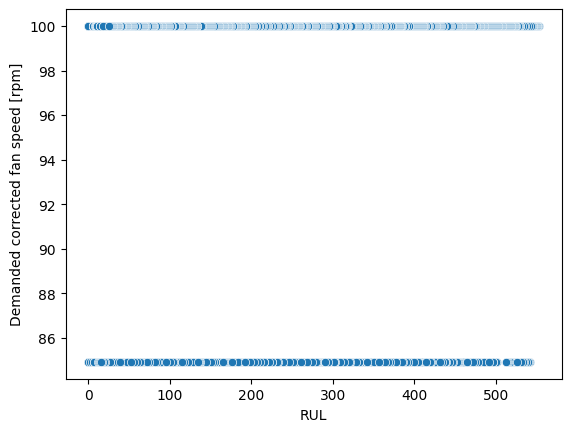

In [8]:
#tracés des données en fonction du RUL pour identifier l'importance des colonnes pour prédire le RUL
for i in range(22):
  sns.scatterplot(data=DATAS, x="RUL", y=List_columns[i])
  plt.show()

# -> aucun paramètre pris tout seul a une influence évidente sur la RUL SAUF la Core speed et corrected core speed : des trop grandes valeurs impliquent souvent un RUL faible